In [146]:
import numpy
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
import matplotlib.pyplot as plt


In [157]:
X = numpy.load('X.npy')
y = numpy.load('y.npy')
n_objects = X.shape[0]
n_features = X.shape[1]
print(n_objects, 'objects,', n_features, 'features')

46034 objects, 17 features


In [165]:
shuffled_inds = numpy.random.choice(numpy.arange(n_objects),n_objects,replace=False)
shuffled_inds = numpy.where( (y == 1)  |  (y == 2) |  (y == 4)|  (y == 5)|  (y == 6)|  (y == 8)|  (y == 13))[0]
shuffled_inds = numpy.random.choice(shuffled_inds,len(shuffled_inds),replace=False)
n_train = 40000
n_test = 10000

train_inds = shuffled_inds[:n_train]
X_train = X[train_inds]
y_train = y[train_inds]

test_inds = shuffled_inds[n_train:(n_train + n_test)]
X_test = X[test_inds]
y_test = y[test_inds]

X_train.shape, X_test.shape

((40000, 17), (4863, 17))

In [159]:
n_trees = 100
C
RF.score(X_train,y_train)

1.0

In [160]:
y_pred = RF.predict(X_test)
RF.score(X_test,y_test)

0.8346699568167798

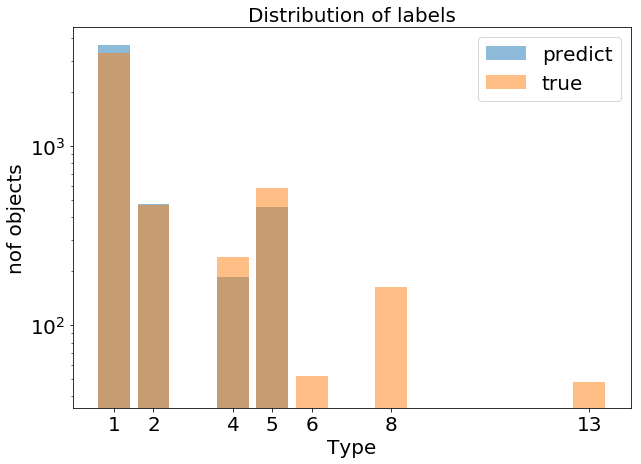

In [163]:
plt.figure(figsize = (10,7))
#plt.hist(var_types,log=True, bins)
counts = Counter(y_pred)
plt.bar(counts.keys(),counts.values(),log=True, label = 'predict', alpha = 0.5)
counts = Counter(y_test)
plt.bar(counts.keys(),counts.values(),log=True, label = 'true', alpha = 0.5)
plt.title('Distribution of labels', fontsize = 20)
plt.xlabel('Type',fontsize = 20)
plt.ylabel('nof objects',fontsize = 20)
plt.xticks(list(counts.keys()), fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.show()

Confusion matrix, without normalization
[[3087   89   17   80    1    7    1]
 [  81  412    0    0    0    0    0]
 [  69    1  139   26    4    0    2]
 [ 249    0   16  306    3    0    0]
 [  20    0    9   16    3    1    0]
 [ 165    0    1    3    0    1    1]
 [  12    0    6    0    0    0   35]]
Normalized confusion matrix
[[9.41e-01 2.71e-02 5.18e-03 2.44e-02 3.05e-04 2.13e-03 3.05e-04]
 [1.64e-01 8.36e-01 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [2.86e-01 4.15e-03 5.77e-01 1.08e-01 1.66e-02 0.00e+00 8.30e-03]
 [4.34e-01 0.00e+00 2.79e-02 5.33e-01 5.23e-03 0.00e+00 0.00e+00]
 [4.08e-01 0.00e+00 1.84e-01 3.27e-01 6.12e-02 2.04e-02 0.00e+00]
 [9.65e-01 0.00e+00 5.85e-03 1.75e-02 0.00e+00 5.85e-03 5.85e-03]
 [2.26e-01 0.00e+00 1.13e-01 0.00e+00 0.00e+00 0.00e+00 6.60e-01]]


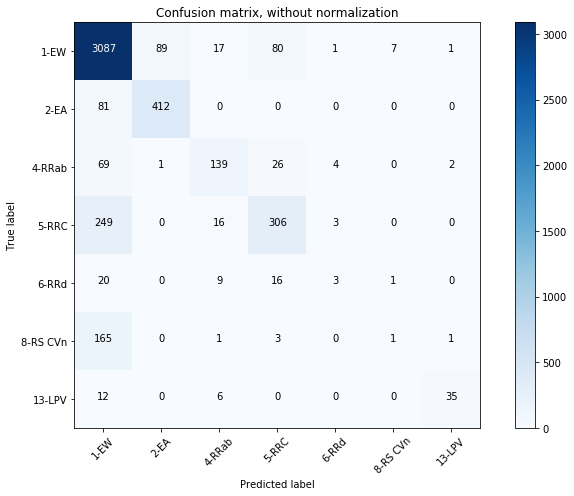

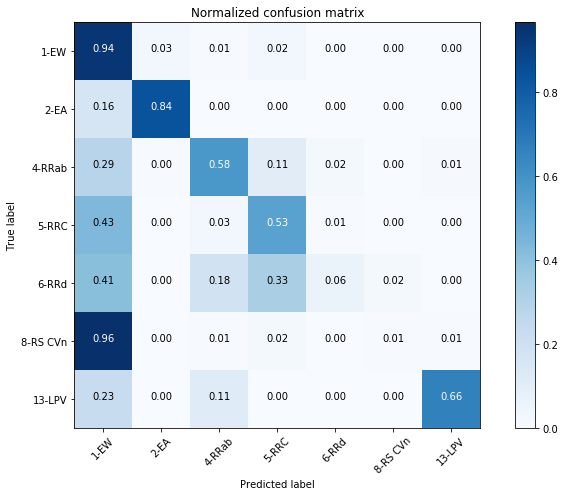

In [167]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


class_names = ['1-EW','2-EA','4-RRab','5-RRC','6-RRd','8-RS CVn','13-LPV']

# Split the data into a training set and a test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
RF = RandomForestClassifier(n_estimators=n_trees,n_jobs=-1)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize = (10,7))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize = (10,7))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()